# Processing Data And Gaining Some Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("data/cleaned_parquet/final/PubMedAbstracts_final.parquet")
df.head()

,uid,title,journal,pubdate,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,date,parsed_date
0,10150804,Evaluation of survival in medically treated pa...,"Journal of insurance medicine (New York, N.Y.)",None-01-01,General: Articles published in medical journal...,Iacovino J R,"New York Life Insurance Company, New York, USA.",Adolescent; Adult; Age Distribution; Chelation...,,N/A,1994-01-01,1994-01-01
1,9061841,Cohort versus cross-sectional design in large ...,Statistics in medicine,1994-Jan-15,General: In planning large longitudinal field ...,Feldman H A; McKinlay S M,"New England Research Institute, Inc., Watertow...",Analysis of Variance; Cluster Analysis; Cohort...,,N/A,1994-01-01,1994-01-15
2,9061840,Network analytic methods for epidemiological r...,Statistics in medicine,1994-Jan-15,General: The authors measure the efficacy of t...,Altmann M; Wee B C; Willard K; Peterson D; Gat...,"Division of Health Computer Sciences, Universi...",Analysis of Variance; Communicable Disease Con...,,N/A,1994-01-01,1994-01-15
3,9061838,"Estimating age, period and cohort effects usin...",Statistics in medicine,1994-Jan-15,General: To understand cancer aetiology better...,Holford T R; Zhang Z; McKay L A,"Department of Epidemiology and Public Health, ...","Age Factors; Cell Transformation, Neoplastic; ...",,N/A,1994-01-01,1994-01-15
4,16353609,A perspective on the hormonal abnormalities of...,Obesity research,1994-Jan-01,General: Studies in our laboratory and elsewhe...,Zumoff B; Strain G W,"Division of Endocrinology and Metabolism, Depa...",Adolescent; Adult; Estradiol; Estrone; Female;...,,N/A,1994-01-01,1994-01-01


In [3]:
# na per column 
df.isna().sum()

uid               0
title             0
journal           0
pubdate           0
abstract         14
authors           0
affiliations      0
mesh_terms        0
keywords          0
coi_statement     0
date              0
parsed_date       0
dtype: int64

### **Step 1**: Filtering rows + removal of missing records (missing abstracts are, after checking manually, missing from articles itself, they are **NOT** due to mistakes in the processing or data gathering)

In [4]:
missing_abstracts = df[df["abstract"].isna()]
print("Rows where 'abstract' is missing:")
missing_abstracts

Rows where 'abstract' is missing:


,uid,title,journal,pubdate,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,date,parsed_date
13973,7479089,Transverse temperature-gradient single-strand ...,Nucleic acids research,1995-Oct-25,None,Grace M B; Bambeck G S; Buzard G S; Weintraub B D,"Diabetes and Digestive and Kidney Diseases, Na...","Electrophoresis, Polyacrylamide Gel; Exons; Hu...",,N/A,1995-10-01,1995-10-25
396952,19951381,Probing the limits of regional tissue oxygenat...,"Critical care (London, England)",2009-01-01,None,Pinsky Michael R; Payen Didier,"Critical Care Medicine, Bioengineering, Cardio...",Hemoglobins; Humans; Microcirculation; Oxygen ...,,N/A,2009-01-01,2009-01-01
714156,28549132,Selective impairment of goal-directed decision...,Brain : a journal of neurology,2017-Jun-01,None,Reber Justin; Feinstein Justin S; O'Doherty Jo...,Department of Psychological and Brain Sciences...,Aged; Brain Diseases; Choice Behavior; Cogniti...,decision-making; devaluation; instrumental; re...,N/A,2017-06-01,2017-06-01
748429,29240851,Off Target But Hitting the Mark.,Journal of hospital medicine,2018-Apr-01,None,Kara Areeba; Mookherjee Somnath; Gavin Warren;...,"Inpatient Medicine, Indiana University Health ...",Abdominal Pain; Adult; Cholecystectomy; Doxycy...,,N/A,2018-04-01,2018-04-01
771404,30496332,Towards Scalable Hospital-Based Palliative Car...,Journal of hospital medicine,2018-Dec-01,None,Courtright Katherine R; O'Connor Nina R,"Division of Pulmonary, Allergy, and Critical C...",Hospitalists; Hospitals; Humans; Palliative Care,,N/A,2018-12-01,2018-12-01
771443,30475933,The vaginal wellness consultation for treatmen...,Seminars in cutaneous medicine and surgery,2018-Dec-01,None,Miller Misha D,Mohs Micrographic Surgery and Cutaneous Oncolo...,Atrophy; Catheter Ablation; Female; Humans; La...,,N/A,2018-12-01,2018-12-01
775681,30667412,Nudging Providers to Improve Sleep for Hospita...,Journal of hospital medicine,2019-Jan-01,None,Auriemma Catherine L; Greysen S Ryan,Division of Pulmonary and Critical Care Medici...,Choice Behavior; Decision Making; Goals; Human...,,N/A,2019-01-01,2019-01-01
775682,30667405,The Journal of Hospital Medicine in 2019 and B...,Journal of hospital medicine,2019-Jan-01,None,Shah Samir S,Divisions of Hospital Medicine and Infectious ...,Biomedical Research; Hospital Medicine; Humans...,,N/A,2019-01-01,2019-01-01
776638,30534643,Clinical Operations Research: A New Frontier f...,Journal of hospital medicine,2019-Jan-08,None,Kohn Rachel; Greysen S Ryan,"Department of Medicine, Perelman School of Med...",General Practice; Humans,,N/A,2019-01-01,2019-01-08
792798,31010740,RETRACTED: Comprehensive Analysis of the Expre...,Molecular therapy : the journal of the America...,2019-Jun-05,None,Sun Cheng-Cao; Li Shu-Jun; Hu Wei; Zhang Jian;...,Department of Occupational and Environmental H...,"Biomarkers, Tumor; Breast Neoplasms; Computati...",E2Fs; Kaplan-Meier Plotter; biomarkers; breast...,N/A,2019-06-01,2019-06-05


In [5]:
x = (df.shape)

# 1) Drop rows with missing abstract (14)
df = df.dropna(subset=["abstract"])

print("Removed missing abstract rows:")
print(x[0]-df.shape[0])

# 2) Drop rows with year == 2025
# first ensure parsed_date is datetime
df["parsed_date"] = pd.to_datetime(df["parsed_date"], errors="coerce")

#df = df[df["parsed_date"].dt.year != 2025]
# Exclude years 1994 and 2025 ; 1994 has low amount of articles
df = df[(df["parsed_date"].dt.year != 1994) & (df["parsed_date"].dt.year != 2025)]

print("Removed total rows:")
print(x[0] - df.shape[0])

Removed missing abstract rows:
14
Removed total rows:
1890


In [6]:
# selecting only columns that we will be working with
df = df[["uid", "title", "journal", "abstract", "authors", "affiliations", "mesh_terms", "keywords", "coi_statement", "parsed_date"]].copy()

In [14]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date
930,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01
931,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01
932,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01
933,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01
934,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01


In [18]:
df["keywords"]

930                                                         
931                                                         
932                                                         
933                                                         
934        Empirical Approach; End Stage Renal Disease Pr...
                                 ...                        
1059756    China; Mental health treatment; attitude; help...
1059757    obstructive sleep apnea; otolaryngology; pedia...
1059758    alternative medicine; chronic wounds; pain ass...
1059759    Alzheimer's disease; aging; glutathione; lipid...
1059760    Arteriovenous malformation; cerebral; liver tr...
Name: keywords, Length: 1057871, dtype: object

In [ ]:
import pandas as pd
from collections import Counter


# Split keywords and clean
import pandas as pd
from collections import Counter

# Split keywords and clean
keywords = [
    kw.strip().lower() 
    for row in df["keywords"] 
    for kw in row.split(";") 
    if kw.strip()  
]

# Count frequencies
keyword_freq = Counter(keywords)
print(keyword_freq.most_common(10))

[('covid-19', 12360), ('inflammation', 6978), ('epidemiology', 6241), ('alzheimer’s disease', 5563), ('hiv', 5542), ('sars-cov-2', 5283), ('cancer', 5091), ('obesity', 4734), ('cardiovascular disease', 4661), ('mortality', 4253)]


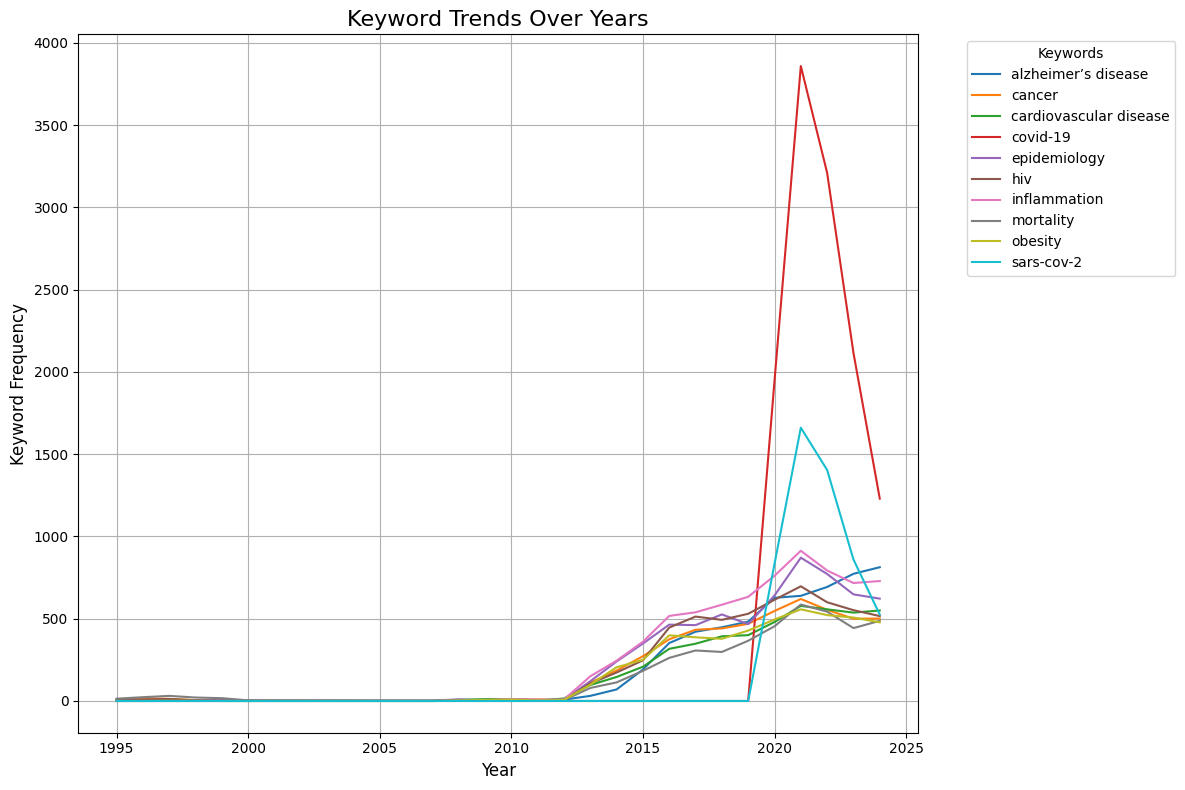

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year
df['year'] = df['parsed_date'].dt.year

# Expand keywords into individual rows, cleaned and lowercase
keyword_rows = (
    df['keywords']
    .dropna()  # Remove rows with missing keywords
    .str.split(';')  # Split keywords by semicolon
    .explode()  # Create a new row for each keyword
    .str.strip()  # Remove extra spaces
    .str.lower()  # Convert to lowercase
)

# Combine expanded keywords with the corresponding year
keyword_data = pd.DataFrame({
    'keyword': keyword_rows,
    'year': df.loc[keyword_rows.index, 'year']
})

# Remove empty keywords
keyword_data = keyword_data[keyword_data['keyword'] != ""]

# Count keyword occurrences per year
keyword_trends = (
    keyword_data
    .groupby(['year', 'keyword'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_keywords = (
    keyword_data['keyword']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_keyword_trends = keyword_trends[keyword_trends['keyword'].isin(top_keywords)]

# Pivot data for plotting
pivot_trends = top_keyword_trends.pivot(index='year', columns='keyword', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Keyword Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Keyword Frequency", fontsize=12)
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


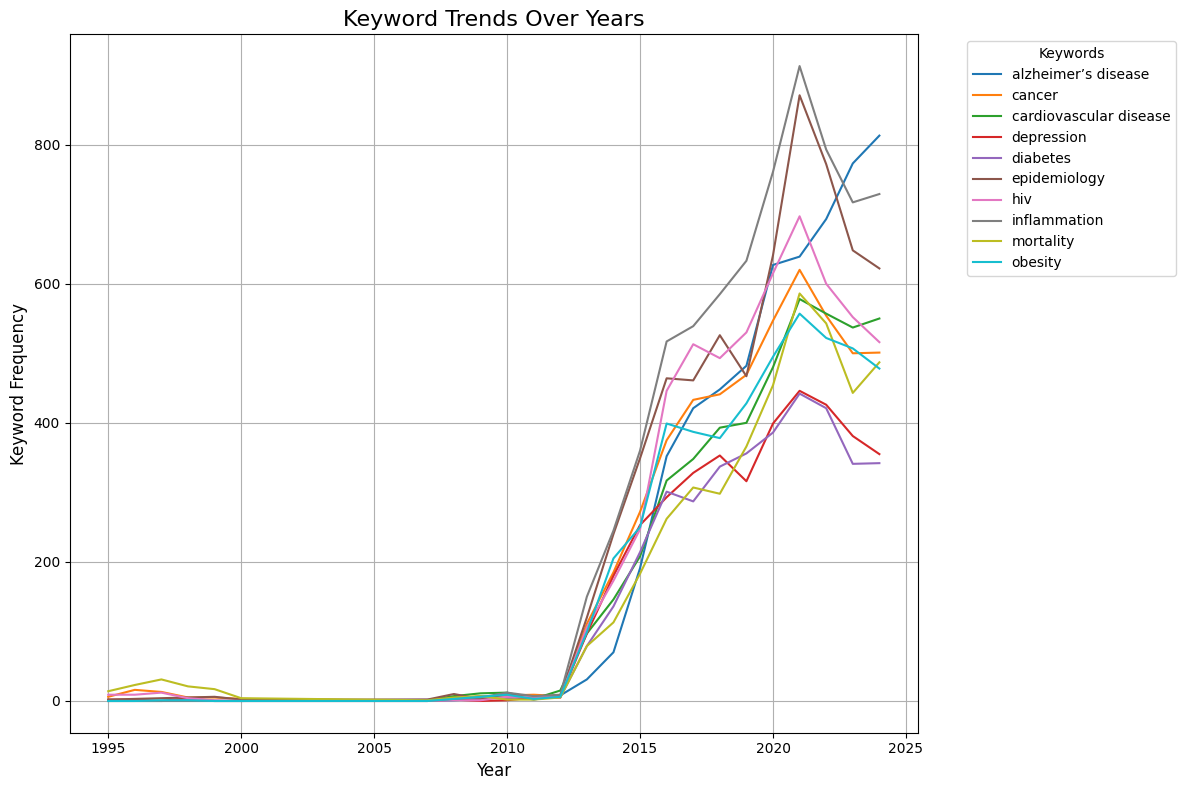

In [45]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 
# Exclude 'sars-cov-2' and 'covid-19' from the analysis
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year
df['year'] = df['parsed_date'].dt.year

# Expand keywords into individual rows, cleaned and lowercase
keyword_rows = (
    df['keywords']
    .dropna()  # Remove rows with missing keywords
    .str.split(';')  # Split keywords by semicolon
    .explode()  # Create a new row for each keyword
    .str.strip()  # Remove extra spaces
    .str.lower()  # Convert to lowercase
)

# Combine expanded keywords with the corresponding year
keyword_data = pd.DataFrame({
    'keyword': keyword_rows,
    'year': df.loc[keyword_rows.index, 'year']
})

# Remove empty keywords
keyword_data = keyword_data[keyword_data['keyword'] != ""]
keyword_data = keyword_data[~keyword_data['keyword'].isin(['sars-cov-2', 'covid-19'])]
# Count keyword occurrences per year
keyword_trends = (
    keyword_data
    .groupby(['year', 'keyword'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_keywords = (
    keyword_data['keyword']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_keyword_trends = keyword_trends[keyword_trends['keyword'].isin(top_keywords)]

# Pivot data for plotting
pivot_trends = top_keyword_trends.pivot(index='year', columns='keyword', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Keyword Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Keyword Frequency", fontsize=12)
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
len(df[(df["year"] == 2007) & (df["keywords"].str.len() > 0)])

50

In [33]:
df[(df["year"] == 2007) & (df["keywords"].str.len() > 0)]

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,year_month,year
321434,18172536,Unprotected left main coronary artery interven...,Texas Heart Institute journal,General: Medical therapy alone often insuffici...,Abuzahra Mohammed M; Mesa Andres; Treistman Be...,"Department of Cardiology, Baylor College of Me...",Aged; Blood Vessel Prosthesis Implantation; Co...,"Angioplasty, transluminal, percutaneous corona...",N/A,2007-01-01,2007-01,2007
321435,18172531,Endovascular exclusion of mycotic aortic aneur...,Texas Heart Institute journal,General: The presence of prohibitive risk may ...,Takach Thomas J; Kane Peter N; Madjarov Jeko M...,Department of Cardiothoracic and Vascular Surg...,"Aneurysm, Infected; Angioscopy; Aortic Aneurys...","Aneurysm, infected/diagnosis/therapy; aortic a...",N/A,2007-01-01,2007-01,2007
321436,18172530,Intraoperative TandemHeart implantation as an ...,Texas Heart Institute journal,General: Newer generations of assist devices f...,Cohn William E; Morris Cullen D; Reverdin Step...,Department of Cardiopulmonary Transplantation ...,Adult; Cardiac Surgical Procedures; Female; Fo...,Cardiac surgi-cal procedures; circulatoryassis...,N/A,2007-01-01,2007-01,2007
321437,18172528,Single coronary artery with prepulmonic coursi...,Texas Heart Institute journal,General: We report the case of a 32-year-old m...,Sanford Garrett B; Molavi Behzad; Sinha Anjan ...,"Department of Internal Medicine, University of...","Angina Pectoris, Variant; Coronary Angiography...",Coronary angiography; Prinzmetal's angina; cor...,N/A,2007-01-01,2007-01,2007
321438,18172526,Mesenteric oxygen desaturation in an infant wi...,Texas Heart Institute journal,General: Congenital heart disease is a risk fa...,Stapleton Gary E; Eble Brian K; Dickerson Heat...,"Divisions of Pediatric Cardiology, Baylor Coll...",Anti-Bacterial Agents; Blood Gas Analysis; Dis...,"Enterocolitis, necrotizing/diagnosis/etiology/...",N/A,2007-01-01,2007-01,2007
321439,18172525,Staged single-ventricle palliation in an infan...,Texas Heart Institute journal,General: Staged single-ventricle palliation is...,Law Mark A; Dreyer Zoann; Heinle Jeffrey S; Di...,"Department of Pediatrics, Section of Cardiolog...","Anastomosis, Surgical; Cardiac Surgical Proced...","Anastomosis, surgical; heart defects, congenit...",N/A,2007-01-01,2007-01,2007
321966,17948094,Chylopericardium presenting as cardiac tampona...,Texas Heart Institute journal,"General: Cardiac tamponade, the accumulation o...",Revere David J; Makaryus Amgad N; Bonaros Elia...,"Divisions of Cardiology, North Shore Long Isla...",Adolescent; Cardiac Tamponade; Electrocardiogr...,Cardiac tamponade/etiology/physio-pathology; c...,N/A,2007-01-01,2007-01,2007
321967,17948090,Lambl's excrescences: review and recommendations.,Texas Heart Institute journal,General: Lambl's excrescences are filiform fro...,Aziz Faisal; Baciewicz Frank A,"Section of Cardio-thoracic Surgery, Wayne Stat...",Aortic Valve; Cerebral Infarction; Confusion; ...,Aortic valve/surgery; Lambl's excrescences; ec...,N/A,2007-01-01,2007-01,2007
325157,19655038,Preference-based instrumental variable methods...,The international journal of biostatistics,General: Observational studies of drugs and me...,Brookhart M Alan; Schneeweiss Sebastian,Division of Pharmacoepidemiology and Pharmacoe...,"Aged; Anti-Inflammatory Agents, Non-Steroidal;...",causal inference; health services research; in...,N/A,2007-01-01,2007-01,2007
325158,19655034,Lessons from the Navajo: assistance with envir...,Progress in community health partnerships : re...,BACKGROUND: The Navajo Nation suffers from a l...,DeLemos Jamie; Rock Tommy; Brugge Doug; Slagow...,"Tufts University, School of Engineering, USA.",Community-Based Participatory Research; Commun...,Environmental health; community health partner...,N/A,2007-01-01,2007-01,2007


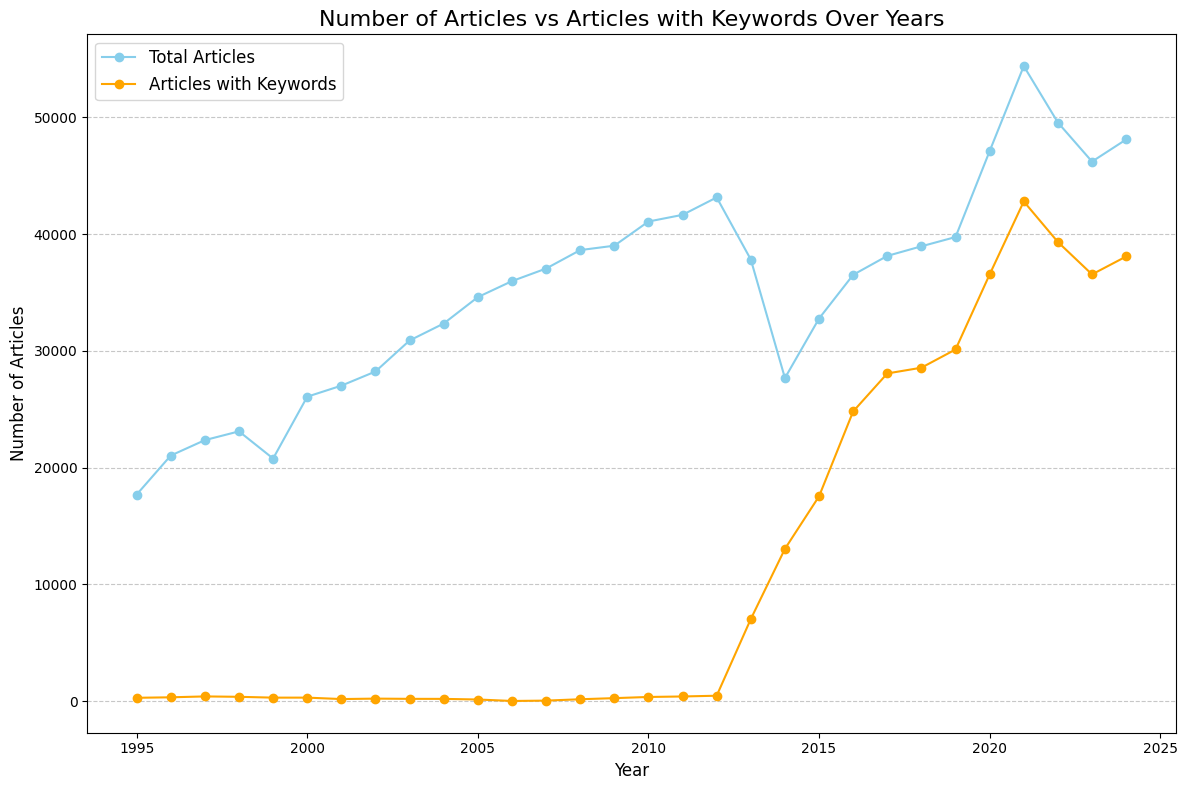

In [41]:


# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year
df['year'] = df['parsed_date'].dt.year

# Total number of articles per year
total_articles_per_year = df.groupby('year').size().reset_index(name='total_articles')

# Number of articles with keywords per year
articles_with_keywords = df[df['keywords'].str.len() > 0]  # Exclude rows with missing keywords
articles_with_keywords_per_year = articles_with_keywords.groupby('year').size().reset_index(name='articles_with_keywords')

# Merge the two datasets
articles_trends = pd.merge(
    total_articles_per_year,
    articles_with_keywords_per_year,
    on='year',
    how='outer'
).fillna(0)

# Ensure numeric columns
articles_trends['total_articles'] = articles_trends['total_articles'].astype(int)
articles_trends['articles_with_keywords'] = articles_trends['articles_with_keywords'].astype(int)

# Plot the data using line plot
plt.figure(figsize=(12, 8))

plt.plot(
    articles_trends['year'], 
    articles_trends['total_articles'], 
    label="Total Articles", 
    marker='o', 
    linestyle='-', 
    color='skyblue'
)
plt.plot(
    articles_trends['year'], 
    articles_trends['articles_with_keywords'], 
    label="Articles with Keywords", 
    marker='o', 
    linestyle='-', 
    color='orange'
)

plt.title("Number of Articles vs Articles with Keywords Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
articles_with_keywords

NameError: name 'total_articles' is not defined